In [10]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

In [11]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

In [12]:
iv3 = InceptionV3()

In [6]:
print(iv3.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

[[('n07749582', 'lemon', 0.9981515),
  ('n07718472', 'cucumber', 0.00015505502),
  ('n07747607', 'orange', 0.00015152646),
  ('n04409515', 'tennis_ball', 8.6352324e-05),
  ('n04509417', 'unicycle', 8.058492e-05)]]

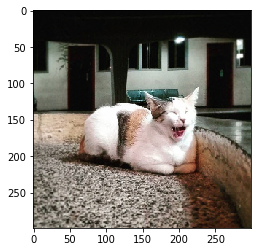

In [15]:
from keras.preprocessing import image
imagePrediction = image.load_img("./images/hacked.png",target_size=(299,299))
x = image.img_to_array(imagePrediction)
#cambio de rango de 0->255 a -1->1
x /= 255
x -= 0.5
x *= 2
x = x.reshape([1,x.shape[0],x.shape[1],x.shape[2]])
y = iv3.predict(x)

plt.figure()
plt.imshow(imagePrediction)
decode_predictions(y)

In [8]:
## Ataquee adversario

inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

target_class = 951

loss = out_layer[0,target_class]

grad = K.gradients(loss,inp_layer)[0]

optimize_gradient = K.function([inp_layer,K.learning_phase()],[grad,loss])

adv = np.copy(x)


pert = 0.01

max_pert = x + 0.01
min_pert = x - 0.01


cost = 0.0

while cost < 0.95:
    gr, cost = optimize_gradient([adv,0])
    
    adv+=gr
    
    adv = np.clip(adv,min_pert,max_pert)
    
    adv = np.clip(adv,-1,1)
    
    print('target cost: ', cost)
    
    
    

target cost:  2.331607e-05
target cost:  2.3326122e-05
target cost:  2.3336243e-05
target cost:  2.3346403e-05
target cost:  2.3356573e-05
target cost:  2.3366783e-05
target cost:  2.3376866e-05
target cost:  2.3387123e-05
target cost:  2.3397288e-05
target cost:  2.3407334e-05
target cost:  2.3417566e-05
target cost:  2.3427656e-05
target cost:  2.3437882e-05
target cost:  2.3448043e-05
target cost:  2.3458233e-05
target cost:  2.3468456e-05
target cost:  2.34787e-05
target cost:  2.3488908e-05
target cost:  2.3499144e-05
target cost:  2.3509405e-05
target cost:  2.3519577e-05
target cost:  2.352984e-05
target cost:  2.354e-05
target cost:  2.3550345e-05
target cost:  2.3560531e-05
target cost:  2.357087e-05
target cost:  2.3581078e-05
target cost:  2.3591449e-05
target cost:  2.360172e-05
target cost:  2.3612e-05
target cost:  2.3622219e-05
target cost:  2.3632427e-05
target cost:  2.3642719e-05
target cost:  2.3653036e-05
target cost:  2.3663237e-05
target cost:  2.3673521e-05
targe

target cost:  2.6522579e-05
target cost:  2.653426e-05
target cost:  2.6545982e-05
target cost:  2.6557682e-05
target cost:  2.6569423e-05
target cost:  2.6581034e-05
target cost:  2.6592863e-05
target cost:  2.660458e-05
target cost:  2.6616324e-05
target cost:  2.662797e-05
target cost:  2.6639531e-05
target cost:  2.6651214e-05
target cost:  2.666289e-05
target cost:  2.6674643e-05
target cost:  2.668643e-05
target cost:  2.6698042e-05
target cost:  2.670979e-05
target cost:  2.672146e-05
target cost:  2.6733167e-05
target cost:  2.6744936e-05
target cost:  2.6756597e-05
target cost:  2.67683e-05
target cost:  2.678015e-05
target cost:  2.6791911e-05
target cost:  2.6803602e-05
target cost:  2.6815376e-05
target cost:  2.6827262e-05
target cost:  2.6839121e-05
target cost:  2.6851043e-05
target cost:  2.686291e-05
target cost:  2.6874888e-05
target cost:  2.6886739e-05
target cost:  2.6898655e-05
target cost:  2.6910631e-05
target cost:  2.6922491e-05
target cost:  2.6934431e-05
tar

target cost:  3.0363992e-05
target cost:  3.0378544e-05
target cost:  3.039293e-05
target cost:  3.0407364e-05
target cost:  3.0421943e-05
target cost:  3.0436417e-05
target cost:  3.045091e-05
target cost:  3.0465451e-05
target cost:  3.0479989e-05
target cost:  3.0494686e-05
target cost:  3.0509244e-05
target cost:  3.0523835e-05
target cost:  3.053855e-05
target cost:  3.0553216e-05
target cost:  3.0567782e-05
target cost:  3.058249e-05
target cost:  3.0597213e-05
target cost:  3.061185e-05
target cost:  3.062662e-05
target cost:  3.064132e-05
target cost:  3.0655992e-05
target cost:  3.067072e-05
target cost:  3.068558e-05
target cost:  3.070031e-05
target cost:  3.071506e-05
target cost:  3.0729825e-05
target cost:  3.0744584e-05
target cost:  3.0759446e-05
target cost:  3.077423e-05
target cost:  3.0789066e-05
target cost:  3.080403e-05
target cost:  3.0818777e-05
target cost:  3.0833762e-05
target cost:  3.0848572e-05
target cost:  3.086362e-05
target cost:  3.0878524e-05
target

target cost:  3.5220324e-05
target cost:  3.5238336e-05
target cost:  3.5256333e-05
target cost:  3.527443e-05
target cost:  3.529234e-05
target cost:  3.53104e-05
target cost:  3.532838e-05
target cost:  3.5346413e-05
target cost:  3.5364512e-05
target cost:  3.5382604e-05
target cost:  3.54008e-05
target cost:  3.5418903e-05
target cost:  3.543713e-05
target cost:  3.5455316e-05
target cost:  3.5473593e-05
target cost:  3.549186e-05
target cost:  3.5509926e-05
target cost:  3.5528145e-05
target cost:  3.554633e-05
target cost:  3.5564637e-05
target cost:  3.5582703e-05
target cost:  3.5600762e-05
target cost:  3.5619003e-05
target cost:  3.5637244e-05
target cost:  3.5655357e-05
target cost:  3.567344e-05
target cost:  3.569159e-05
target cost:  3.570984e-05
target cost:  3.572809e-05
target cost:  3.574623e-05
target cost:  3.576443e-05
target cost:  3.5782727e-05
target cost:  3.5801007e-05
target cost:  3.5819317e-05
target cost:  3.583758e-05
target cost:  3.5855795e-05
target co

KeyboardInterrupt: 